From Intro to ANN with Keras by Aurélien Géron Ch 10

# Building an Image Classifier Using the Sequential API

In [11]:
from tensorflow import keras

from tensorflow.keras.datasets import fashion_mnist as fashion_MNIST

import tensorflow as tf

In [8]:
fashion_mnist = fashion_MNIST.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# keep 5000 instances for validation
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]

X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

4422102/4422102 [==============================] - 2s 0us/step


In [9]:
# scale the pixel intensities to 0-1
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [ ]:
# set the labels for available images
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Sequential Model

In [20]:
def make_seq_model(input_dim, output_dim):
    
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=[input_dim, input_dim]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(output_dim, activation="softmax")
    ])
    
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
    
    return(model)

In [12]:
tf.random.set_seed(21)

model = keras.Sequential()

2023-03-02 10:41:12.600765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.add(keras.layers.Input(shape=[28, 28]))

In [14]:
model.add(keras.layers.Flatten())

In [16]:
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate = 0.01), # stochastic gradient descent
              metrics=["accuracy"]) # accuracy is sparse_categorical_accuracy from tf.keras.metrics

In [26]:
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7131 - accuracy: 0.7657 - val_loss: 0.5070 - val_accuracy: 0.8198
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4887 - accuracy: 0.8309 - val_loss: 0.4950 - val_accuracy: 0.8174
Epoch 3/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4440 - accuracy: 0.8458 - val_loss: 0.4209 - val_accuracy: 0.8478
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4193 - accuracy: 0.8536 - val_loss: 0.4236 - val_accuracy: 0.8510
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3980 - accuracy: 0.8610 - val_loss: 0.4024 - val_accuracy: 0.8512
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3826 - accuracy: 0.8657 - val_loss: 0.3770 - val_accuracy: 0.8616
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3691 - accuracy: 0.8701 - val_loss: 0.3893 - val_accuracy:

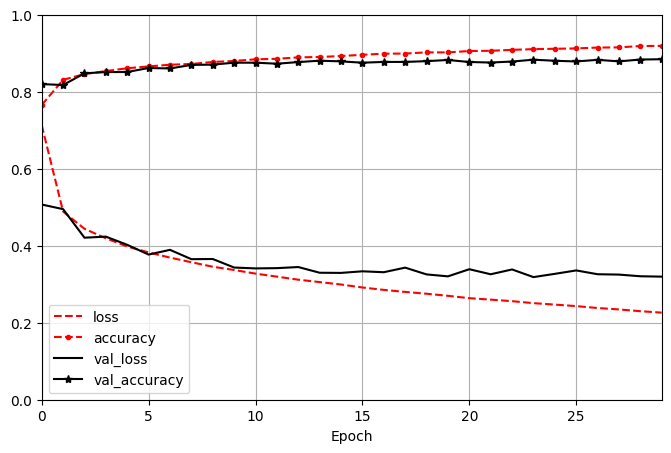

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "k-", "k-*"])
plt.show()